In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_moons


X, y = make_moons(n_samples=300, noise=0.1)

In [3]:
X, y

(array([[ 1.02201738e+00, -3.85361127e-01],
        [-5.69284834e-01,  6.18359603e-01],
        [ 9.77007332e-02,  2.89325204e-01],
        [ 1.96722489e+00,  4.50110815e-01],
        [-4.40531817e-01,  1.10650254e+00],
        [-2.03122478e-01,  9.69409897e-01],
        [-7.55118375e-01,  6.13904283e-01],
        [ 1.00498194e+00,  5.93207821e-01],
        [ 1.64316342e+00, -4.31348217e-01],
        [ 1.00154075e+00, -4.23919429e-01],
        [ 6.89471850e-01,  8.12936167e-01],
        [ 1.48476887e+00, -3.97870238e-01],
        [ 2.00079802e+00,  3.09159683e-02],
        [ 6.16104641e-01, -3.10198128e-01],
        [-8.71335647e-01,  6.13745992e-01],
        [ 8.53243833e-02,  2.17967988e-01],
        [ 1.48559925e+00, -3.37674808e-01],
        [ 2.71021982e-02,  9.68171855e-01],
        [-9.25199516e-02,  4.67457064e-02],
        [-8.90888047e-01,  2.49898071e-01],
        [ 1.94106231e+00,  9.09961471e-02],
        [-7.42321457e-01,  5.71109578e-01],
        [ 4.63599041e-01,  1.037

In [4]:
X_outliers = np.random.uniform(low=-3, high=3, size=(20, 2))
X = np.vstack((X, X_outliers))

In [5]:
X

array([[ 1.02201738e+00, -3.85361127e-01],
       [-5.69284834e-01,  6.18359603e-01],
       [ 9.77007332e-02,  2.89325204e-01],
       [ 1.96722489e+00,  4.50110815e-01],
       [-4.40531817e-01,  1.10650254e+00],
       [-2.03122478e-01,  9.69409897e-01],
       [-7.55118375e-01,  6.13904283e-01],
       [ 1.00498194e+00,  5.93207821e-01],
       [ 1.64316342e+00, -4.31348217e-01],
       [ 1.00154075e+00, -4.23919429e-01],
       [ 6.89471850e-01,  8.12936167e-01],
       [ 1.48476887e+00, -3.97870238e-01],
       [ 2.00079802e+00,  3.09159683e-02],
       [ 6.16104641e-01, -3.10198128e-01],
       [-8.71335647e-01,  6.13745992e-01],
       [ 8.53243833e-02,  2.17967988e-01],
       [ 1.48559925e+00, -3.37674808e-01],
       [ 2.71021982e-02,  9.68171855e-01],
       [-9.25199516e-02,  4.67457064e-02],
       [-8.90888047e-01,  2.49898071e-01],
       [ 1.94106231e+00,  9.09961471e-02],
       [-7.42321457e-01,  5.71109578e-01],
       [ 4.63599041e-01,  1.03723301e+00],
       [ 1.

In [7]:
out = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = out.fit_predict(X)

In [8]:
y_pred

array([ 1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1

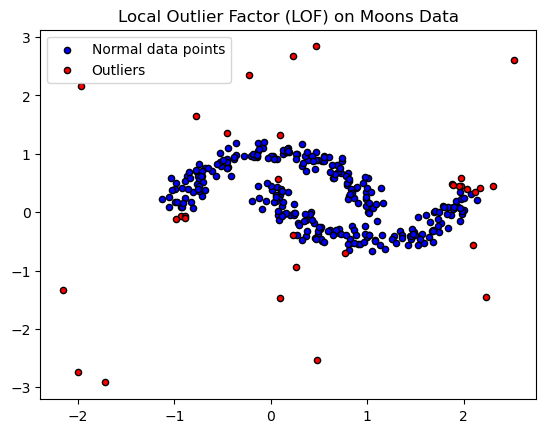

In [9]:
# Separate normal data points>>inliers and outliers 
X_inliers = X[y_pred == 1]
X_outliers = X[y_pred == -1]

# Plotting
plt.title("Local Outlier Factor (LOF) on Moons Data")
plt.scatter(X_inliers[:, 0], X_inliers[:, 1], color='b', s=20, edgecolor='k', label='Normal data points')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='r', s=20, edgecolor='k', label='Outliers')
plt.legend()
plt.show()